In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score

### Best Model : all features!

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1400)

Loading data

In [2]:
filename = 'processed_data/ALL40_48.npy'
with open(filename, 'rb') as f:
    ALL40_48 = np.load(f)

In [3]:
filename = 'processed_data/ZE_48.npy'
# open file in write mode and write data
with open(filename, 'rb') as f:
    Z = np.load(f)
    E = np.load(f)
    Y = np.load(f)

Splitting

In [4]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(ALL40_48, Y, test_size=0.05, random_state=42)

In [5]:
model = RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)

Training

In [6]:
model.fit(X_train_b,y_train_b)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)

Checking Evaluation

In [7]:
predictions = model.predict(X_test_b)
print(accuracy_score(y_test_b, predictions))

0.9953703703703703


Saving the model

In [8]:
## save
joblib.dump(model, "./random_forest.joblib")

## load, no need to initialize the loaded_rf
#loaded_rf = joblib.load("./random_forest.joblib")

['./random_forest.joblib']

## Confusion Matrix

In [9]:
import os

In [10]:
cwd = os.getcwd()

In [11]:
cwd

'/home/src/ML_2x_Augmentation'

In [12]:
%ls

CSVs/                      eval_classifiers.py
Saving_Best_Model.ipynb    general_preprocessing.ipynb
Summarize.ipynb            modeling_with_mfccs.ipynb
Test_SHAP_values.ipynb     modeling_with_more_features.ipynb
Tuning_RandomForest.ipynb  processed_data/
__pycache__/               random_forest/
all_features.png           random_forest.joblib
augmentation.py            random_forest_final/
best_results.png           results/


In [13]:
loaded_rf = joblib.load("./random_forest.joblib")

In [14]:
predictions = loaded_rf.predict(X_test_b)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [16]:
confusion_matrix(y_test_b,predictions)

array([[12,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32]])

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


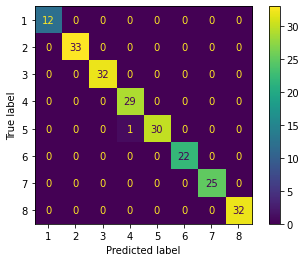

In [17]:
plot_confusion_matrix(loaded_rf, X_test_b, y_test_b)
plt.show() 

### Feature Importance! (pendiente)

Asumo que no existe correlación entre las variables (difícil de aceptar, puesto que en el caso de formantes vocálicas existe un grado de correlación para vocales -- bandas de energia paralelas --) 

In [18]:
from sklearn.inspection import permutation_importance

def feature_importance(clf, X, y, top_limit=None):

    # Retrieve the Bunch object after 50 repeats
    # n_repeats is the number of times that each feature was permuted to compute the final score
    bunch = permutation_importance(clf, X, y,
                                 n_repeats=50, random_state=42)

    # Average feature importance
    imp_means = bunch.importances_mean

    # List that contains the index of each feature in descending order of importance
    ordered_imp_means_args = np.argsort(imp_means)[::-1]

    # If no limit print all features
    if top_limit is None:
        top_limit = len(ordered_imp_means_args)

  # Print relevant information
    for i, _ in zip(ordered_imp_means_args, range(top_limit)):
        name = data.feature_names[i]
        imp_score = imp_means[i]
        imp_std = bunch.importances_std[i]
        print(f"Feature {name} with index {i} has an average importance score of {imp_score:.3f} +/- {imp_std:.3f}\n")

### Aparentemente requiere de un pd dataframe para listar con nombres las características!

In [ ]:
# colapsa para muchas caracteristicas!
feature_importance(loaded_rf, X_test_b, y_test_b)

In [ ]:
feature_importance(rf_clf, X_train_b, y_train_b)

### Reentrenando el modelo con las 20 características más importantes

In [ ]:
print("On TRAIN split:\n")
feature_importance(rf_clf, X_train, y_train, top_limit=3)

print("\nOn TEST split:\n")
feature_importance(rf_clf, X_test, y_test, top_limit=3)

En el ejemplo, una vez realizado el análisis, vuelve a entrenar con $x$ nuevas características

```python
# Preserve only the top 3 features
X_train_top_features = X_train[:,[6, 9, 12]]
X_test_top_features = X_test[:,[6, 9, 12]]

# Re-train with only these features
rf_clf_top = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_clf_top.score(X_test_top_features, y_test)
```

En mi caso tendría que seleccionar las características segun aparezca un nombre o algo similar. (mejor intentarlo en colab)

Una conclusión interesante del tutorial fue la interpretación del resultado:
    
    ** Notice that by using only the 3 most important features the model achieved a mean accuracy even higher than the one using all 13 features. Remember that the alcohol feature was deemed not important in the train split but you had the hypotheses that it had important information for the generalization of the model. **